# 온라인쇼핑 이용 데이터 분석 리포트

이 리포트는 [KDX 데이터 거래소](https://kdx.kr/data/view?product_id=31454)에서 가져온 **[온라인쇼핑 요일/시간대별 이용 특징]** 데이터를 이용해 분석을 진행했습니다.


In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font', family='Arial Unicode MS')

In [167]:
customer_list = pd.read_excel("data/온라인쇼핑 요일:시간대별 이용 특징.xlsx")

customer_list

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
2,201905,골프용품,휴일,일,F.22-02시,M,B.3O대,51
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
4,202005,인테리어,평일,월,C.10-14시,F,D.5O대,1101
...,...,...,...,...,...,...,...,...
21552,201905,패션,평일,월,F.22-02시,M,C.4O대,2470
21553,202005,골프용품,평일,금,D.14-18시,F,C.4O대,107
21554,202105,스포츠의류용품,평일,화,E.18-22시,M,B.3O대,603
21555,202105,인테리어,평일,화,C.10-14시,F,E.60대이상,415


In [169]:
customer_list_40s_M = customer_list[(customer_list['연령대']=='C.4O대') & (customer_list['성별']=='M')]

customer_list_40s_M

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
6,202005,서적,휴일,일,A.02-06시,M,C.4O대,128
17,202105,차량정비_부품,휴일,수,D.14-18시,M,C.4O대,303
22,202105,패션,평일,금,A.02-06시,M,C.4O대,670
37,202105,홈쇼핑,휴일,토,D.14-18시,M,C.4O대,3362
...,...,...,...,...,...,...,...,...
21535,202005,패션,평일,목,D.14-18시,M,C.4O대,4720
21550,202005,식료품,휴일,금,B.06-10시,M,C.4O대,430
21551,201905,패션,휴일,수,F.22-02시,M,C.4O대,796
21552,201905,패션,평일,월,F.22-02시,M,C.4O대,2470


---

원형 그래프를 통해 40대 남성은 어떤 시간대에 사용을 많이 하는지 파악해보겠습니다.

In [170]:
# 시간대 파악
customer_list_40s_M['시간대'].value_counts()

시간대
D.14-18시    364
A.02-06시    364
B.06-10시    364
E.18-22시    364
F.22-02시    364
C.10-14시    364
Name: count, dtype: int64

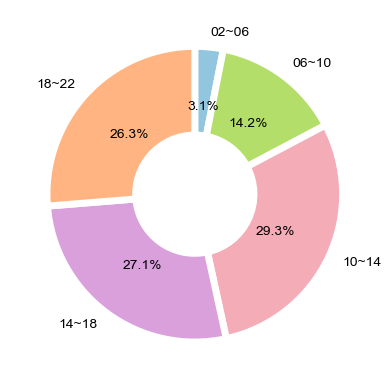

In [185]:
timezone_40s_M = [customer_list_40s_M[customer_list_40s_M['시간대']=='A.02-06시']['건수합계'].sum(),
                  customer_list_40s_M[customer_list_40s_M['시간대']=='B.06-10시']['건수합계'].sum(),
                  customer_list_40s_M[customer_list_40s_M['시간대']=='C.10-14시']['건수합계'].sum(),
                  customer_list_40s_M[customer_list_40s_M['시간대']=='D.14-18시']['건수합계'].sum(),
                  customer_list_40s_M[customer_list_40s_M['시간대']=='E.18-22시']['건수합계'].sum()]

labels_time_40s_M = ['02~06','06~10','10~14','14~18','18~22']

colors = ['#92c5de', '#b3de69', '#f4acb7', '#d9a0dc', '#ffb482']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(timezone_40s_M,labels=labels_time_40s_M,autopct='%.1f%%', startangle=90, counterclock=False,wedgeprops=wedgeprops,colors=colors)

plt.show()

주로 구매는 10시에서 22시 사이에 많이 이루어진것을 확인할 수 있습니다.

---

## 40대 남성의 시간대별 구매 비율

In [217]:
# 구매 물품 리스트
product_list = []
for product in customer_list_40s_M['TAG']:
    if product not in product_list:
        product_list.append(product)

# 10시~14시 구매 비율
product_40s_M_10_14 = []
for product in product_list:
    product_40s_M_10_14.append(customer_list_40s_M[(customer_list_40s_M['시간대']=='C.10-14시') & (customer_list_40s_M['TAG']==product)]['건수합계'].sum()
                               /customer_list_40s_M[customer_list_40s_M['시간대']=='C.10-14시']['건수합계'].sum())

# 14시~18시 구매 비율
product_40s_M_14_18 = []
for product in product_list:
    product_40s_M_14_18.append(customer_list_40s_M[(customer_list_40s_M['시간대']=='D.14-18시') & (customer_list_40s_M['TAG']==product)]['건수합계'].sum()
                               /customer_list_40s_M[customer_list_40s_M['시간대']=='D.14-18시']['건수합계'].sum())

# 18시~22시 구매 비율
product_40s_M_18_22 = []
for product in product_list:
    product_40s_M_18_22.append(customer_list_40s_M[(customer_list_40s_M['시간대']=='E.18-22시') & (customer_list_40s_M['TAG']==product)]['건수합계'].sum()
                               /customer_list_40s_M[customer_list_40s_M['시간대']=='E.18-22시']['건수합계'].sum())

<function matplotlib.pyplot.show(close=None, block=None)>

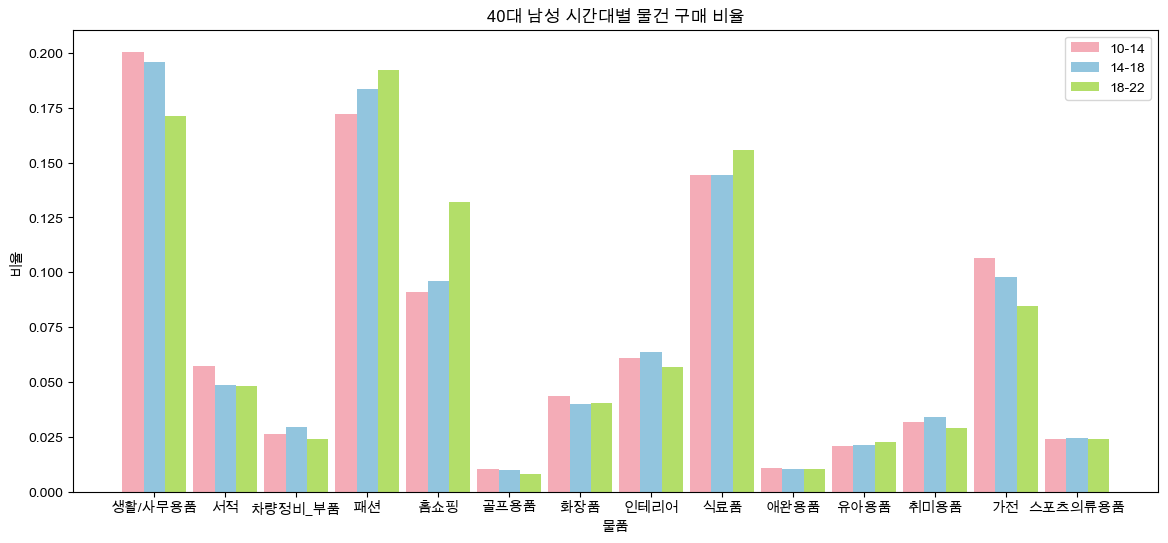

In [218]:
plt.figure(figsize=(14, 6))

x = np.arange(len(product_list))

plt.bar(x - 0.3, product_40s_M_10_14, width=0.3, color='#f4acb7', label='10-14')
plt.bar(x, product_40s_M_14_18, width=0.3, color='#92c5de', label='14-18')
plt.bar(x + 0.3, product_40s_M_18_22, width=0.3, color='#b3de69', label='18-22')

plt.xlabel('물품')
plt.ylabel('비율')
plt.title('40대 남성 시간대별 물건 구매 비율')
plt.xticks(ticks=x, labels=product_list)
plt.legend()

plt.show

### 40대 남성 시간대별 비교 분석 📊
+ 인기 많은 품목 top3는 생활/사무용품, 패션, 식료품 순이다.

+ **생활/사무용품은 10~18시에 구매율이 높다**는 것을 확인할 수 있다. '근무 시간에 생활/사무용품을 구입할 확률이 더 크다'는 가설을 세울 수 있다.

+ **홈쇼핑은 18~22시에 구매율이 높다**는 것을 확인할 수 있다. '퇴근 후 홈쇼핑으로 구매할 확률이 더 크다'는 가설을 세울 수 있다.

+ 다른 물품은 확연한 차이를 보이고 있지 않고 있다.

In [194]:
customer_list_40s_F = customer_list[(customer_list['연령대']=='C.4O대') & (customer_list['성별']=='F')]

# 10시~14시 구매 비율
product_40s_F_10_14 = []
for product in product_list:
    product_40s_F_10_14.append(customer_list_40s_F[(customer_list_40s_F['시간대']=='C.10-14시') & (customer_list_40s_F['TAG']==product)]['건수합계'].sum()
                               /customer_list_40s_F[customer_list_40s_F['시간대']=='C.10-14시']['건수합계'].sum())

# 14시~18시 구매 비율
product_40s_F_14_18 = []
for product in product_list:
    product_40s_F_14_18.append(customer_list_40s_F[(customer_list_40s_F['시간대']=='D.14-18시') & (customer_list_40s_F['TAG']==product)]['건수합계'].sum()
                               /customer_list_40s_F[customer_list_40s_F['시간대']=='D.14-18시']['건수합계'].sum())

# 18시~22시 구매 비율
product_40s_F_18_22 = []
for product in product_list:
    product_40s_F_18_22.append(customer_list_40s_F[(customer_list_40s_F['시간대']=='E.18-22시') & (customer_list_40s_F['TAG']==product)]['건수합계'].sum()
                               /customer_list_40s_F[customer_list_40s_F['시간대']=='E.18-22시']['건수합계'].sum())

---

## 40대 여성의 시간대별 구매 비율

<function matplotlib.pyplot.show(close=None, block=None)>

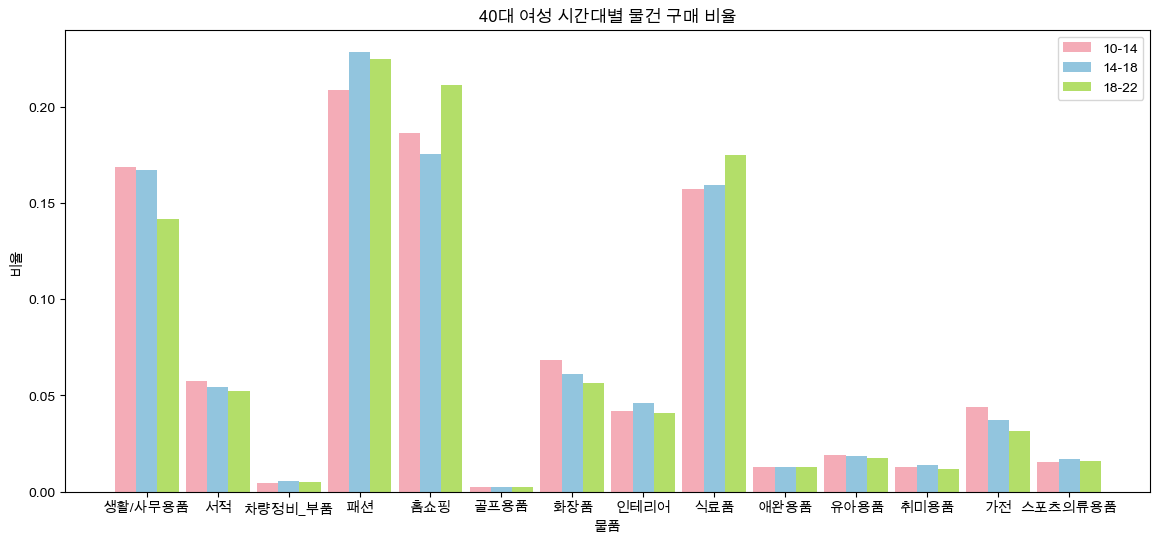

In [201]:
plt.figure(figsize=(14, 6))

x = np.arange(len(product_list))

plt.bar(x - 0.3, product_40s_F_10_14, width=0.3, color='#f4acb7', label='10-14')
plt.bar(x, product_40s_F_14_18, width=0.3, color='#92c5de', label='14-18')
plt.bar(x + 0.3, product_40s_F_18_22, width=0.3, color='#b3de69', label='18-22')

plt.xlabel('물품')
plt.ylabel('비율')
plt.title('40대 여성 시간대별 물건 구매 비율')
plt.xticks(ticks=x, labels=product_list)
plt.legend()

plt.show

### 40대 여성 시간대별 비교 분석 📊

+ 인기 많은 품목 top3는 패션,홈쇼핑, 그리고 생활/사무용품과 식료품이 비슷한 값을 가진다.

+ 홈쇼핑, 식료품 정도가 18~22시 사이에 구매가 더 이루어지는 것을 확인 할 수 있다.

+ 생활/사무용품과 홈쇼핑에 대한 가설을 여기서도 비슷하게 세울 수 있다.

---

## 40대 남성 VS 여성

In [203]:
product_40s_M = []
for product in product_list:
    product_40s_M.append(customer_list_40s_M[customer_list_40s_M['TAG']==product]['건수합계'].sum()
                               /customer_list_40s_M['건수합계'].sum())
    
product_40s_F = []
for product in product_list:
    product_40s_F.append(customer_list_40s_F[customer_list_40s_F['TAG']==product]['건수합계'].sum()
                               /customer_list_40s_F['건수합계'].sum())

<function matplotlib.pyplot.show(close=None, block=None)>

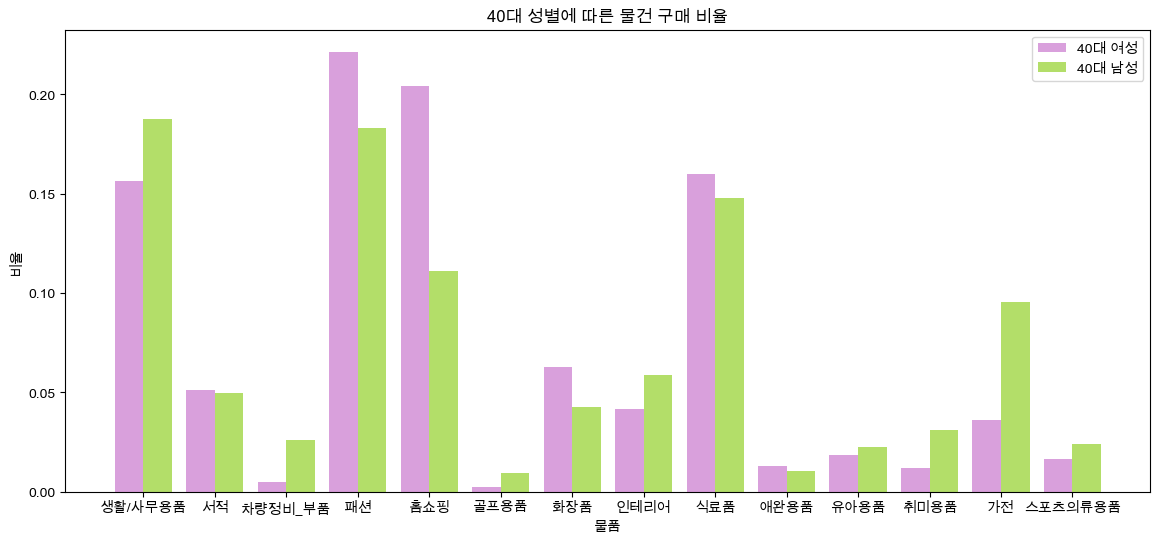

In [215]:
plt.figure(figsize=(14, 6))

x = np.arange(len(product_list))

plt.bar(x - 0.2, product_40s_F, width=0.4, color='#d9a0dc', label='40대 여성')
plt.bar(x+0.2, product_40s_M, width=0.4, color='#b3de69', label='40대 남성')

plt.xlabel('물품')
plt.ylabel('비율')
plt.title('40대 성별에 따른 물건 구매 비율')
plt.xticks(ticks=x, labels=product_list)
plt.legend()

plt.show

### 40대 여성과 40대 남성 비교 분석 📊
+ 생활/사무용품, 패션, 식료품은 성별과 상관 없이 인기가 많다. 이 때 생활/사무용품은 남성이 더 구매하는 경향이 컸고, 패션은 여성이 더 크다는 사실을 확인할 수 있다.

+ 홈쇼핑, 패션은 여성쪽에서 확연히 구매가 더 일어났다.

+ 차량정비_부품, 골프용품, 취미용품, 가전은 전체적인 비율은 비교적 낮지만, 그 안에서만 살펴보면 남성의 구매비율이 압도적으로 높은 것을 확인할 수 있다.

---

## 남성 나이대별 비교

In [220]:
# 20대 남성 구매 비율 리스트
customer_list_20s_M = customer_list[(customer_list['연령대']=='A.2O대') & (customer_list['성별']=='M')]
product_20s_M = []
for product in product_list:
    product_20s_M.append(customer_list_20s_M[customer_list_20s_M['TAG']==product]['건수합계'].sum()
                               /customer_list_20s_M['건수합계'].sum())

# 30대 남성 구매 비율 리스트    
customer_list_30s_M = customer_list[(customer_list['연령대']=='B.3O대') & (customer_list['성별']=='M')]
product_30s_M = []
for product in product_list:
    product_30s_M.append(customer_list_30s_M[customer_list_30s_M['TAG']==product]['건수합계'].sum()
                               /customer_list_30s_M['건수합계'].sum())

# 50대 남성 구매 비율 리스트
customer_list_50s_M = customer_list[(customer_list['연령대']=='D.5O대') & (customer_list['성별']=='M')]
product_50s_M = []
for product in product_list:
    product_50s_M.append(customer_list_50s_M[customer_list_50s_M['TAG']==product]['건수합계'].sum()
                               /customer_list_50s_M['건수합계'].sum())


# 60대 남성 구매 비율 리스트
customer_list_60s_M = customer_list[(customer_list['연령대']=='E.60대이상') & (customer_list['성별']=='M')]
product_60s_M = []
for product in product_list:
    product_60s_M.append(customer_list_60s_M[customer_list_60s_M['TAG']==product]['건수합계'].sum()
                               /customer_list_60s_M['건수합계'].sum())

<function matplotlib.pyplot.show(close=None, block=None)>

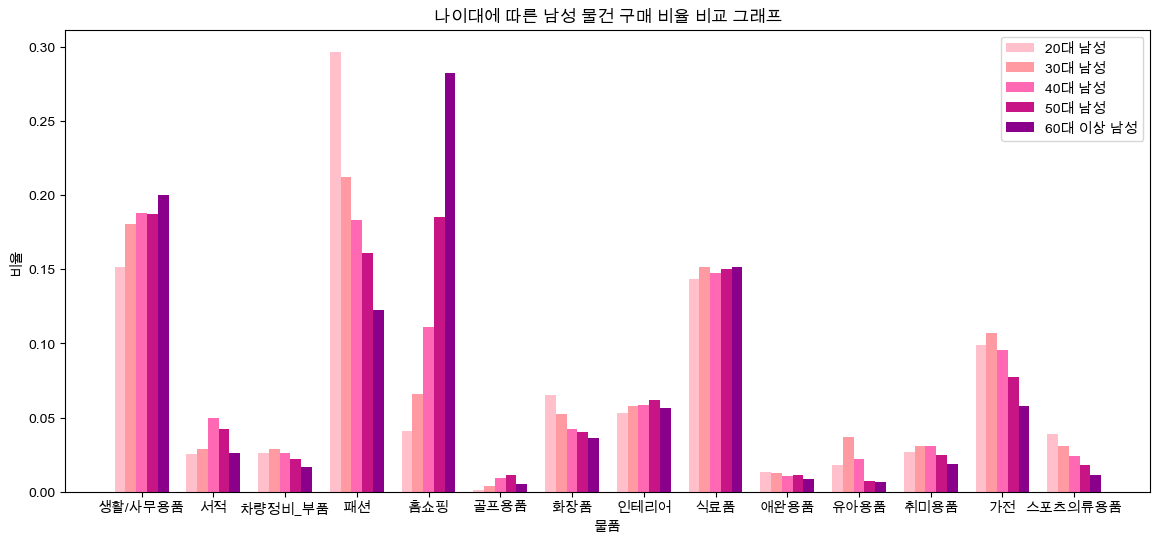

In [229]:
plt.figure(figsize=(14, 6))

x = np.arange(len(product_list))

plt.bar(x - 0.3, product_20s_M, width=0.15, color='#FFC0CB', label='20대 남성')
plt.bar(x-0.15, product_30s_M, width=0.15, color='#FF9AA2', label='30대 남성')
plt.bar(x, product_40s_M, width=0.15, color='#FF69B4', label='40대 남성')
plt.bar(x+0.15, product_50s_M, width=0.15, color='#C71585', label='50대 남성')
plt.bar(x+0.3, product_60s_M, width=0.15, color='#8B008B', label='60대 이상 남성')

plt.xlabel('물품')
plt.ylabel('비율')
plt.title('나이대에 따른 남성 물건 구매 비율 비교 그래프')
plt.xticks(ticks=x, labels=product_list)
plt.legend()

plt.show

### 남성 나이대에 따른 비교 분석 📊
+ 생활/사무용품과 홈쇼핑은 나이가 증가함에 따라 구매 비율이 증가한다. 특히 **홈쇼핑의 증가 정도는 매우 큰 것**을 확인할 수 있다.

+ 패션, 화장품, 스포츠의류용품은 나이가 증가함에 따라 구매 비율이 감소했다. 특히 **패션의 감소 정도는 매우 큰 것**을 확인할 수 있다.

+ 가전, 유아용품, 차량정비_부품은 30대 남정의 구매 비중이 가장 큰것을 확인 할 수 있다. '신혼 가구와 관련 있을 것이라는 가설'을 세울 수 있다.

+ 식료품, 인테리어, 애완용품은 나이대와 크게 무관한 모습을 보이는 것을 확인할 수 있다.